### <center> Heights and weights simple regression</center>

### Data Description <br>

<li><b>Heights</b> - Heights in inches</li>
<li><b>Weights</b> - Weights in Pounds</li>

In [1]:
# importing the libraries from library notebook
%run required_libraries.ipynb

In [2]:
hw_df = pd.read_csv(r"C:\Users\dines\Downloads\Datasets\Heights_weights\SOCR-HeightWeight.csv")
hw_df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
hw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [4]:
hw_df.drop('Index', axis=1, inplace=True)

In [5]:
hw_df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


### Converting inches of heights to centimeters.

In [6]:
def inches_to_centimeters(inches):
    return inches * 2.54

hw_df['Height(cm)'] = hw_df['Height(Inches)'].apply(lambda inches: inches_to_centimeters(inches))
hw_df.head()

,Height(Inches),Weight(Pounds),Height(cm)
0,65.78331,112.9925,167.089607
1,71.51521,136.4873,181.648633
2,69.39874,153.0269,176.272800
3,68.21660,142.3354,173.270164
4,67.78781,144.2971,172.181037


In [7]:
def pounds_to_kg(pounds):
    return pounds * 0.453592

hw_df['Weight(kg)'] = hw_df['Weight(Pounds)'].apply(lambda pounds: pounds_to_kg(pounds))
hw_df.head()

,Height(Inches),Weight(Pounds),Height(cm),Weight(kg)
0,65.78331,112.9925,167.089607,51.252494
1,71.51521,136.4873,181.648633,61.909547
2,69.39874,153.0269,176.272800,69.411778
3,68.21660,142.3354,173.270164,64.562199
4,67.78781,144.2971,172.181037,65.452010


### Data preprocessing

In [8]:
hw_df_temp = hw_df[['Height(cm)', 'Weight(kg)']]
hw_df_temp.head()

,Height(cm),Weight(kg)
0,167.089607,51.252494
1,181.648633,61.909547
2,176.272800,69.411778
3,173.270164,64.562199
4,172.181037,65.452010


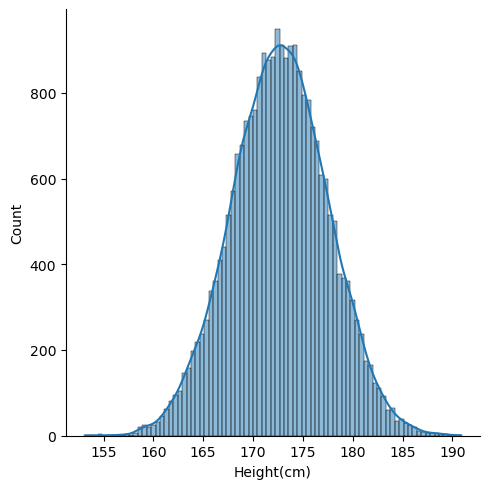

In [9]:
sns.displot(data = hw_df_temp, x='Height(cm)', kde=True)

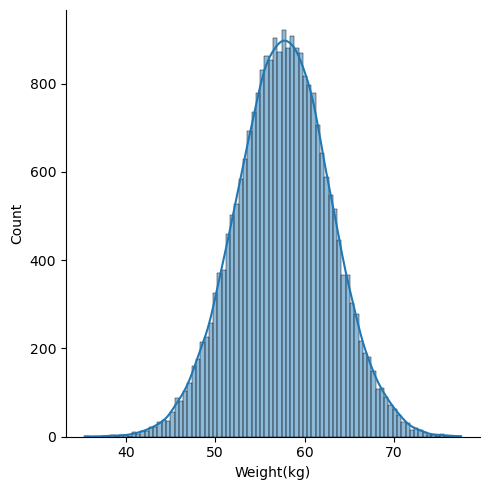

In [10]:
sns.displot(data = hw_df_temp, x='Weight(kg)', kde=True)

In [11]:
# Train_test_split
from sklearn.model_selection import train_test_split

inputs = hw_df_temp[['Height(cm)']]
target = hw_df_temp[['Weight(kg)']]

X_train, X_test, y_train, y_test = train_test_split(inputs, target, train_size=0.8, random_state=60)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20000, 1) (20000, 1)
(5000, 1) (5000, 1)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

In [14]:
lr_reg = LinearRegression()

lr_model_fit = lr_reg.fit(X_train, y_train)
pred = lr_model_fit.predict(X_test)

mse = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
print(RMSE)
print(mse)

4.59511833510554
21.115112513623114


In [15]:
dt_reg = DecisionTreeRegressor()

model_fit_dt = lr_reg.fit(X_train, y_train)
dt_pred = model_fit_dt.predict(X_test)

r2_scr = r2_score(y_test, dt_pred)
print(r2_scr)

0.2580599585550566


In [16]:
rndm_reg = RandomForestRegressor()

model_fit_rndm = lr_reg.fit(X_train, y_train)
rndm_pred = model_fit_rndm.predict(X_test)

r2_scr = r2_score(y_test, rndm_pred)
print(r2_scr)

0.2580599585550566


In [17]:
train_score = lr_model_fit.score(X_train, y_train)
print(train_score)

test_score = lr_model_fit.score(X_test, y_test)
print(test_score)

0.2515033006999401
0.2580599585550566


In [18]:
model_fit_rndm.predict([[181.089607]])

C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[62.251518]])